In [11]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

from raytracer import *
from heliostat_field import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
hstats = create_heliostat_field(20, [5, 5])
receiver_pos = np.array([0, 0, 10])
incident_vec = norm_vector(np.array([0.5, 0, -1]))

model = align_heliostat_field(hstats, incident_vec, receiver_pos, reflecting_width=0.1)
print(model['mirror_positions'])

[[-9.97327388e+00 -1.00400892e+01  1.33630621e-02]
 [-1.00267261e+01 -9.95991081e+00 -1.33630621e-02]
 [-4.96666667e+00 -1.00333333e+01  1.66666667e-02]
 [-5.03333333e+00 -9.96666667e+00 -1.66666667e-02]
 [ 4.08248290e-02 -1.00204124e+01  2.04124145e-02]
 [-4.08248290e-02 -9.97958759e+00 -2.04124145e-02]
 [ 5.04472136e+00 -1.00000000e+01  2.23606798e-02]
 [ 4.95527864e+00 -1.00000000e+01 -2.23606798e-02]
 [ 1.00408248e+01 -9.97958759e+00  2.04124145e-02]
 [ 9.95917517e+00 -1.00204124e+01 -2.04124145e-02]
 [-9.98438262e+00 -5.04685213e+00  7.80868809e-03]
 [-1.00156174e+01 -4.95314787e+00 -7.80868809e-03]
 [-4.97817821e+00 -5.04364358e+00  1.09108945e-02]
 [-5.02182179e+00 -4.95635642e+00 -1.09108945e-02]
 [ 3.33333333e-02 -5.03333333e+00  1.66666667e-02]
 [-3.33333333e-02 -4.96666667e+00 -1.66666667e-02]
 [ 5.04472136e+00 -5.00000000e+00  2.23606798e-02]
 [ 4.95527864e+00 -5.00000000e+00 -2.23606798e-02]
 [ 1.00333333e+01 -4.96666667e+00  1.66666667e-02]
 [ 9.96666667e+00 -5.03333333e+

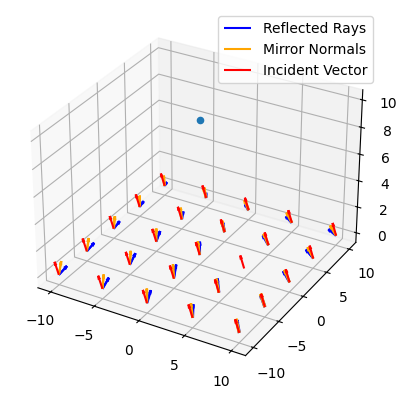

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(model['mirror_positions'][:, 0], model['mirror_positions'][:, 1], model['mirror_positions'][:, 2], 
            model['reflected_vectors'][:, 0],model['reflected_vectors'][:, 1], model['reflected_vectors'][:, 2], 
            color='b', label="Reflected Rays")
ax.quiver(model['mirror_positions'][:, 0], model['mirror_positions'][:, 1], model['mirror_positions'][:, 2], 
            model['mirror_normals'][:, 0],model['mirror_normals'][:, 1], model['mirror_normals'][:, 2], 
            color='orange', label="Mirror Normals")
ax.quiver(hstats[:, 0], hstats[:, 1], hstats[:, 2], 
            -incident_vec[0], -incident_vec[1], -incident_vec[2], 
            color='red', label="Incident Vector")           
ax.scatter(receiver_pos[0], receiver_pos[1], zs=receiver_pos[2])
ax.legend()
plt.show()

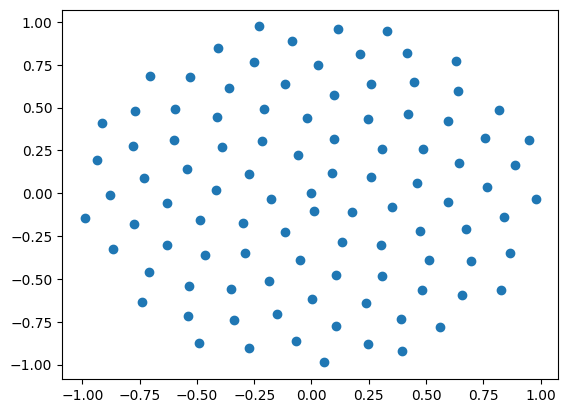

In [14]:
points = sunflower(100, 0.7)
xs, ys = (points[:, 0], points[:, 1])
plt.scatter(xs, ys)

points_plane = np.column_stack((points, np.zeros((100))))

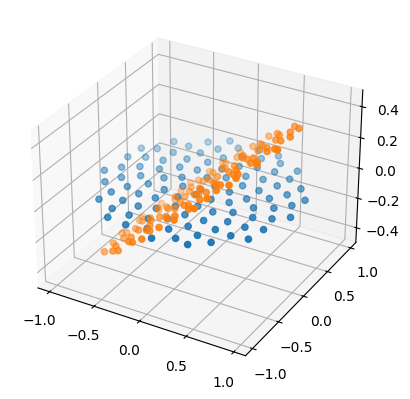

In [15]:

R = rotation_matrix_from_vectors(np.array((0, 0, 1)), incident_vec)

rotated_points = []
for point in points_plane:
    rotated_points.append(np.array((np.matmul(R, point))))
rotated_points = np.array(rotated_points)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_plane[:, 0], points_plane[:, 1], points_plane[:, 2],
           )
ax.scatter(rotated_points[:, 0], rotated_points[:, 1], rotated_points[:, 2],
           )
plt.show()

